In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[*********************100%%**********************]  8 of 8 completed


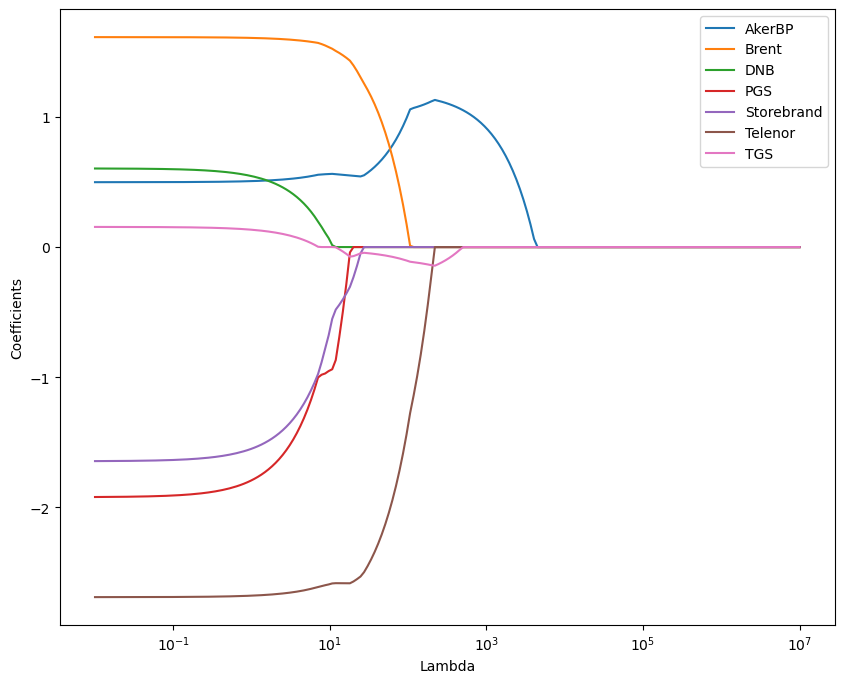

In [17]:
tickers = ['EQNR.OL', 'BZ=F', 'DNB.OL', 'AKRBP.OL', 'STB.OL', 'TEL.OL', 'TGS.OL', 'PGS.OL']

df = yf.download(tickers, period='5Y')['Adj Close'].dropna()

df = df.rename(columns={'EQNR.OL': 'Equinor', 'BZ=F': 'Brent', 'DNB.OL': 'DNB', 'AKRBP.OL': 'AkerBP', 'STB.OL': 'Storebrand', 'TEL.OL': 'Telenor', 'TGS.OL': 'TGS', 'PGS.OL': 'PGS'})

# do a lasso regression
X = df.drop(columns=['Equinor'])
y = df['Equinor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lamdas = 10**np.linspace(-2, 7, 200)

coefs = []
for i in lamdas:
    lasso = Lasso(alpha=i, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 8))
plt.plot(lamdas, coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.legend(X.columns)

